In [492]:
import numpy as np
import matplotlib.pyplot as plt

In [477]:
#initalisation of parameters
sig_ep = 1 # sigma of epsilon (noise standard error)
sig_beta = 10
N = 1 # number of samples
d = 2 # dimension of beta
Beta_star = sig_beta*np.random.randn(d) #real value of Beta

In [478]:
# First part: generation of samples
# funtion for generating N samples
def generate_samples(sig_ep, N, d, Beta):
    X = np.random.randn(N, d, d)
    Y = np.dot(X,Beta) + sig_ep*np.random.randn(N, d)
    return(X,Y)

# Obtained Samples
[X, Y] = generate_samples(sig_ep, N, d,Beta_star)

In [479]:
# second part: calculate Beta from samples
def calculate_posterior_beta(X, Y, d, N):
    X = np.reshape(X, (N*d, d))
    A = np.vstack((np.hstack((np.identity(N*d),X)),np.hstack((np.zeros([d,N*d]),np.identity(d)))))
    A = np.mat(A)

    SIG_ep_Beta = np.zeros((N * d + d, N * d + d))
    SIG_ep_Beta[0:N * d][:,0:N * d] = sig_ep*np.identity(N*d)
    SIG_ep_Beta[N * d:][:,N * d:N * d + d] = sig_beta*np.identity(d)
    
    
    SIG_Y_Beta = A*np.mat(SIG_ep_Beta)*np.transpose(A)
        
    SIG_Y = SIG_Y_Beta[0:N * d][:,0:N * d]
        
    SIG_beta = SIG_Y_Beta[N * d:SIG_Y_Beta.shape[0]][:,N * d:SIG_Y_Beta.shape[1]]
    
    SIG_Y_beta = SIG_Y_Beta[0:N * d][:,N * d:SIG_Y_Beta.shape[1]]
    
    SIG_beta_Y = SIG_Y_Beta[N * d:SIG_Y_Beta.shape[0]][:,0:N * d]
    
    
    posteriorMeanBeta = 0 + np.dot(np.dot(SIG_beta_Y, np.linalg.inv(SIG_Y)), Y.reshape(N * d))
    posteriorMeanBeta = np.array(posteriorMeanBeta).reshape(-1)

    posteriorCovBeta = SIG_beta - np.dot(SIG_beta_Y, np.dot(np.linalg.inv(SIG_Y), SIG_Y_beta))
    
    return posteriorMeanBeta, posteriorCovBeta

In [480]:
posteriorMeanBeta, posteriorCovBeta = calculate_posterior_beta(X, Y, d, N)

In [481]:
np.random.multivariate_normal(posteriorMeanBeta, posteriorCovBeta)

array([ 8.37403426, -9.73347126])

## Concentration pour la convergence presque sur

In [507]:
def check_concentration(speed, N_samples_for_estimation, n, d, sig_ep, sig_beta):
    proba_list = []
    
    Beta_star = sig_beta*np.random.randn(d) #real value of Beta
    for i in range(1, n):
        [X, Y] = generate_samples(sig_ep, i, d,Beta_star)
        posteriorMeanBeta, posteriorCovBeta = calculate_posterior_beta(X, Y, d, i)
        count_inside_ball = 0
        for k in range(N_samples_for_estimation):
            count_inside_ball += np.linalg.norm(np.random.multivariate_normal(posteriorMeanBeta, posteriorCovBeta) - Beta_star)< 1 / speed(i)
        proba_list.append(count_inside_ball / N_samples_for_estimation)
    
    return proba_list

/Users/anne/anaconda/envs/modal/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


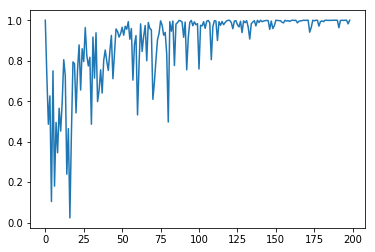

In [615]:
plt.plot(check_concentration(np.log, 1000, n=100, d=5, sig_ep=1, sig_beta=10))

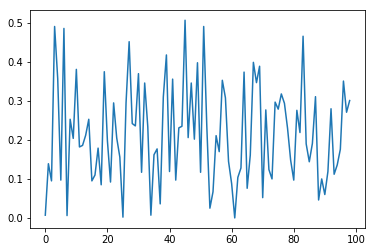

In [616]:
plt.plot(check_concentration(np.sqrt, 1000, 100, 5, 1, 10))

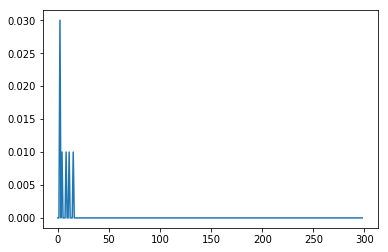

In [514]:
plt.plot(check_concentration(lambda x: x, 100, 300, 5, 1, 10))

In [597]:
def plot_ball(speed, N_samples_for_estimation, n, d, sig_ep, sig_beta):
    Beta_star = sig_beta*np.random.randn(d) #real value of Beta
    [X, Y] = generate_samples(sig_ep, n, d,Beta_star)
    
    posteriorMeanBeta, posteriorCovBeta = calculate_posterior_beta(X, Y, d, n)
    
    ax=plt.subplot(aspect='equal')
    plt.scatter(Beta_star[0], Beta_star[1], c="red")
    for i in range(N_samples_for_estimation):
        sample = np.random.multivariate_normal(posteriorMeanBeta, posteriorCovBeta)
        plt.scatter(sample[0], sample[1], c="blue")
    circle = plt.Circle(Beta_star, 1/speed(n), fill=False)
    ax.add_artist(circle)

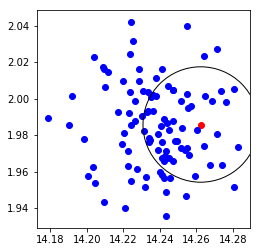

In [613]:
plot_ball(np.sqrt, 100, 1000, 2, 1, 10)

## Concentration pour la convergence en proba

In [593]:
def check_concentration_proba_convergence(speed, N_samples_for_beta_star, N_samples_for_estimation, n, d, sig_ep, sig_beta, epsilon):
    epsilon_proba_list_for_n = []

    for i in range(1, n):
        epsilon_proba_list = []
        for j in range(N_samples_for_beta_star):
            Beta_star = sig_beta*np.random.randn(d) #real value of Beta
            [X, Y] = generate_samples(sig_ep, i, d,Beta_star)
            posteriorMeanBeta, posteriorCovBeta = calculate_posterior_beta(X, Y, d, i)
            count_inside_ball = 0
            for k in range(N_samples_for_estimation):
                count_inside_ball += np.linalg.norm(np.random.multivariate_normal(posteriorMeanBeta, posteriorCovBeta) - Beta_star)< 1 / speed(i)
            epsilon_proba_list.append(count_inside_ball / N_samples_for_estimation)
        epsilon_proba_list_for_n.append(sum([a < (1-epsilon) for a in epsilon_proba_list])/len(epsilon_proba_list))
    return epsilon_proba_list_for_n

/Users/anne/anaconda/envs/modal/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


199


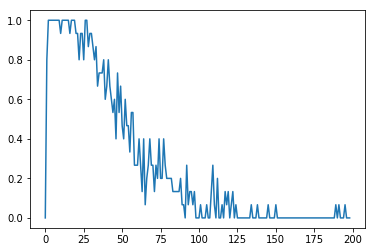

In [595]:
plt.plot(check_concentration_proba_convergence(np.log, 15, 100, 200, 5, 1, 10, 0.1))

In [2]:
import pystan

ImportError: dlopen(/Users/anne/anaconda/envs/modal/lib/python3.7/site-packages/pystan/_api.cpython-37m-darwin.so, 2): Symbol not found: __ZNKSt5ctypeIcE13_M_widen_initEv
  Referenced from: /Users/anne/anaconda/envs/modal/lib/python3.7/site-packages/pystan/_api.cpython-37m-darwin.so (which was built for Mac OS X 10.13)
  Expected in: /usr/lib/libstdc++.6.0.9.dylib
 in /Users/anne/anaconda/envs/modal/lib/python3.7/site-packages/pystan/_api.cpython-37m-darwin.so

In [3]:
schools_code = """
data {
    int<lower=0> J; // number of schools
    vector[J] y; // estimated treatment effects
    vector<lower=0>[J] sigma; // s.e. of effect estimates
}
parameters {
    real mu;
    real<lower=0> tau;
    vector[J] eta;
}
transformed parameters {
    vector[J] theta;
    theta = mu + tau * eta;
}
model {
    eta ~ normal(0, 1);
    y ~ normal(theta, sigma);
}
"""

schools_dat = {'J': 8,
               'y': [28,  8, -3,  7, -1,  1, 18, 12],
               'sigma': [15, 10, 16, 11,  9, 11, 10, 18]}

sm = pystan.StanModel(model_code=schools_code)
fit = sm.sampling(data=schools_dat, iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_19a09b474d1901f191444eaf8a6b8ce2 NOW.


ImportError: dlopen(/var/folders/5j/mld7bj2960b_xm7v228yxs280000gn/T/tmpayivdu4p/stanfit4anon_model_19a09b474d1901f191444eaf8a6b8ce2_6762171373679425987.cpython-37m-darwin.so, 2): Symbol not found: __ZNKSt5ctypeIcE13_M_widen_initEv
  Referenced from: /var/folders/5j/mld7bj2960b_xm7v228yxs280000gn/T/tmpayivdu4p/stanfit4anon_model_19a09b474d1901f191444eaf8a6b8ce2_6762171373679425987.cpython-37m-darwin.so
  Expected in: /usr/lib/libstdc++.6.0.9.dylib
 in /var/folders/5j/mld7bj2960b_xm7v228yxs280000gn/T/tmpayivdu4p/stanfit4anon_model_19a09b474d1901f191444eaf8a6b8ce2_6762171373679425987.cpython-37m-darwin.so